<center> <h1> Machine Learning Assignment</h1> </center>
<center> <h1> Gender Prediction using Scikit-Learn </h1> </center>
<center> <h1> (Step-wise Tutorial)</h1> </center>
<br><br><br>



<b> - Input:</b> Set of Attributes (Height, Weight, Hair Length, Beard, Scarf))<br><br>
<b> - Output:</b> Gender (Male/Female)<br><br>
<b> - Goal:</b> Learn from Input to predict Output<br><br>
    
<h3> Three Phases of Machine Learning: </h3><br><br>
<b>1. Training Phase </b>– Learn from Training Dataset.<br><br>
<b>2. Testing/Validation/Evaluation Phase</b> – Evaluate how well the algorithm learned.<br><br>
<b>3. Application Phase</b>– Use your learned/trained models in real world application.<br><br>


<center><h1> Table of Contents </h1></center>
<h2>PHASE 1 & 2: TRAINING AND TESTING </h2>

**Step 1:** Import Libraries<br><br>
**Step 2:** Read, Understand and Pre-process Train/Test Data<br><br>
**Step 2.1:** Read Data<br><br>
**Step 2.2:** Understand Data<br><br>
**Step 2.3:** Pre-process Data<br><br>
**Step 3:** Label Encoding for Train/Test Data<br><br>
**Step 4:** Feature Extraction – Changing Representation of features “from String to Feature-Vector”<br><br>
**Step 5:** Train Machine Learning Algorithms using Training Data<br><br>
**Step 6:** Evaluate Machine Learning Algorithms using Test Data<br><br>
**Step 7:** Selection of Best Model<br><br><br><br>


<h2> PHASE 3: APPLICATION PHASE</h2><br>
**Step 8:** Application Phase<br><br>
**Step 8.1:** Combine Dataset (Train + Test )¶<br><br>
**Step 8.2:** Train Best Model (see Step 7) on all data(Train+Test)<br><br>
**Step 8.3:** Save the Trained Model in Pickle File<br><br>
**Step 9:** Make predictions on unseen/new data<br><br>
**Step 9.1:** Load the Trained Model (saved in Step 8.3)<br><br>
**Step 9.2:** Take Input from User<br><br>
**Step 9.3:** Convert User Input into Feature Vector (Same as Feature Vector of Trained Model)<br><br>
**Step 9.4:** Apply Trained Model on Feature Vector of Unseen Dataset and Output Prediction (Male/Female) to User


# Step 1: Import Libraries

In [1]:
import re
import scipy
import string
import pickle
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder            
from sklearn.svm import LinearSVC             
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier          
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score    

from astropy.table import Table, Column 


# Step 2: Read, Understand & Pre-process Train/Test Data

In [2]:
train_dataset=pd.read_csv('train.csv')
test_dataset=pd.read_csv('test.csv')
a="Train Dataset:"
print(a)
print('='*len(a)+"\n")
print(train_dataset)
print("\n\n")
b="Attributes Names in Train Dataset:"
print(b)
print('='*len(b)+"\n")
print(train_dataset.columns)
print("\n\n")
c="Number of instances in Train Dataset:"
print(c)
print('='*len(c)+"\n")
print("Train Data instances: ",train_dataset.shape[0])

Train Dataset:

     height  weight    hair beard scarf  gender
0  180.3000     196    Bald   Yes    No    Male
1  170.0000     120    Long    No    No  Female
2  178.5000     200   Short    No    No    Male
3  163.4000     110  Medium    No   Yes  Female
4  175.2222     220   Short   Yes    No    Male
5  165.0000     150  Medium    No   Yes  Female



Attributes Names in Train Dataset:

Index(['height', 'weight', 'hair', 'beard', 'scarf', 'gender'], dtype='object')



Number of instances in Train Dataset:

Train Data instances:  6


In [3]:
print("\n\n")
a="Test Dataset:"
print(a)
print('='*(len(a)-1))
print(test_dataset)
print("\n\n")
b="Attributes Names in Test Dataset :"
print(b)
print('='*(len(b)-1))
print("\n")
print(test_dataset.columns)
print("\n\n")
c="Number of instances in Test Dataset:"
print(c)
print('='*(len(c)-1))
print("Test Data instances: ",test_dataset.shape[0])




Test Dataset:
   height  weight    hair beard scarf  gender
0   179.1     185    Long   Yes    No    Male
1   160.5     130   Short    No    No  Female
2   177.8     160    Bald    No    No    Male
3   161.1     100  Medium    No    No  Female



Attributes Names in Test Dataset :


Index(['height', 'weight', 'hair', 'beard', 'scarf', 'gender'], dtype='object')



Number of instances in Test Dataset:
Test Data instances:  4


In [4]:
data=train_dataset[train_dataset['gender']=='Male']
a="Train male instances : "+str(data.shape[0])
print(a)
print('='*len(a))
print(data)
print("\n\n")
data1=train_dataset[train_dataset['gender']=='Female']
b="Train instances having label 'Female': "+str(data1.shape[0])
print(b)
print('='*len(b))
print("")
print(data1)

Train male instances : 3
     height  weight   hair beard scarf gender
0  180.3000     196   Bald   Yes    No   Male
2  178.5000     200  Short    No    No   Male
4  175.2222     220  Short   Yes    No   Male



Train instances having label 'Female': 3

   height  weight    hair beard scarf  gender
1   170.0     120    Long    No    No  Female
3   163.4     110  Medium    No   Yes  Female
5   165.0     150  Medium    No   Yes  Female


In [5]:
data=test_dataset[test_dataset['gender']=='Male']
a="Test male instances : "+str(data.shape[0])
print(a)
print('='*len(a))
print(data)
print("\n\n")
data1=test_dataset[test_dataset['gender']=='Female']
b="Test instances having label 'Female': "+str(data1.shape[0])
print(b)
print('='*len(b))
print("")
print(data1)

Test male instances : 2
   height  weight  hair beard scarf gender
0   179.1     185  Long   Yes    No   Male
2   177.8     160  Bald    No    No   Male



Test instances having label 'Female': 2

   height  weight    hair beard scarf  gender
1   160.5     130   Short    No    No  Female
3   161.1     100  Medium    No    No  Female


### Understanding Data via Graphs

Total number of 'Males' and 'Females' in Train Dataset:


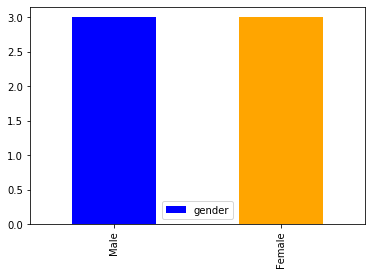

In [6]:

a="Total number of 'Males' and 'Females' in Train Dataset:"
print(a)
print('='*len(a))
graph=train_dataset['gender'].value_counts().plot.bar(stacked=True, color=['b','orange'],legend=True)


Total number of 'Males' and 'Females' in Test Dataset:


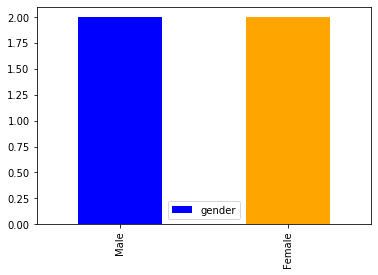

In [7]:
a="Total number of 'Males' and 'Females' in Test Dataset:"
print(a)
print('='*len(a))
graph=test_dataset['gender'].value_counts().plot.bar(color=['b','orange'],legend=True)
graph

Number of people having various hair length in Train dataset:


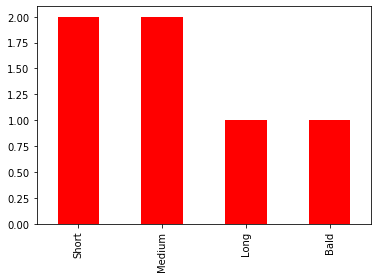

In [8]:
a="Number of people having various hair length in Train dataset:"
print(a)
print('='*(len(a)-1))
train_dataset['hair'].value_counts().plot.bar(color='r')

Number of people having various hair length in Test dataset:


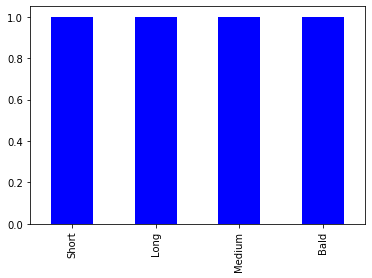

In [9]:
a="Number of people having various hair length in Test dataset:"
print(a)
print('='*(len(a)-1))
test_dataset['hair'].value_counts().plot.bar(color='b')

Number of people have/haven't beard in Train dataset:


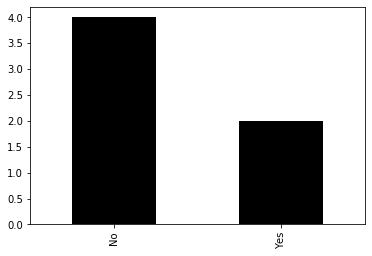

In [10]:
a="Number of people have/haven't beard in Train dataset:"
print(a)
print('='*(len(a)-1))
train_dataset['beard'].value_counts().plot.bar(color='k')

Number of people have/haven't beard in Test dataset:


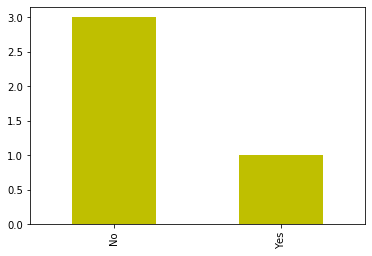

In [11]:
a="Number of people have/haven't beard in Test dataset:"
print(a)
print('='*(len(a)-1))
test_dataset['beard'].value_counts().plot.bar(color='y')

### Step 2.3: Pre-Process Data

In [12]:
a="Train data before pre-processing:"
b='='*(len(a)+10)
print(a)
print(b)
print('\n')
print(train_dataset)
c="Train data after pre-processing:"
print('\n')
print(c)
print(b)
print('\n')
train_dataset_preprocessed=train_dataset
train_dataset_preprocessed['height']=round(train_dataset['height'],2)
print(train_dataset_preprocessed)

Train data before pre-processing:


     height  weight    hair beard scarf  gender
0  180.3000     196    Bald   Yes    No    Male
1  170.0000     120    Long    No    No  Female
2  178.5000     200   Short    No    No    Male
3  163.4000     110  Medium    No   Yes  Female
4  175.2222     220   Short   Yes    No    Male
5  165.0000     150  Medium    No   Yes  Female


Train data after pre-processing:


   height  weight    hair beard scarf  gender
0  180.30     196    Bald   Yes    No    Male
1  170.00     120    Long    No    No  Female
2  178.50     200   Short    No    No    Male
3  163.40     110  Medium    No   Yes  Female
4  175.22     220   Short   Yes    No    Male
5  165.00     150  Medium    No   Yes  Female


# Step 3: Label Encoding for Test/Train Data

#### Label encoding train dataset

In [13]:
from sklearn.preprocessing import LabelEncoder
a="Gender attribute Label Encoding in Train dataset:"
b='='*len(a)
print(a)
print(b)
print('\n')
train_encoded=train_dataset
gender_encoder=LabelEncoder()
gender_encoder.fit(train_encoded['gender'])
train_encoded['encoded_gender']=gender_encoder.transform(train_encoded['gender'])
scarf_encoder=LabelEncoder()
scarf_encoder.fit(train_encoded['scarf'])
train_encoded['encoded_scarf']=scarf_encoder.transform(train_encoded['scarf'])
beard_encoded=LabelEncoder()
beard_encoded.fit(train_encoded['beard'])
train_encoded['encoded_beard']=beard_encoded.transform(train_encoded['beard'])
hair_encoded=LabelEncoder()
hair_encoded.fit(train_encoded['hair'])
train_encoded['encoded_hair']=hair_encoded.transform(train_encoded['hair'])
print(train_encoded[['gender','encoded_gender']])
print('\n')
b="Scarf attribute Label Encoding in Train dataset:"
c='='*len(b)
print(b)
print(c)
print(train_encoded[['hair','encoded_hair']])
print('\n')

b="Beard attribute Label Encoding in Train dataset:"
print(b)
c='='*len(b)
print(c)
print('\n')
print(train_encoded[['beard','encoded_beard']])
print('\n')

b="Hair attribute Label Encoding in Train dataset:"
c='='*len(b)
print(b)
print(c)
print('\n')
print(train_encoded[['hair','encoded_hair']])


Gender attribute Label Encoding in Train dataset:


   gender  encoded_gender
0    Male               1
1  Female               0
2    Male               1
3  Female               0
4    Male               1
5  Female               0


Scarf attribute Label Encoding in Train dataset:
     hair  encoded_hair
0    Bald             0
1    Long             1
2   Short             3
3  Medium             2
4   Short             3
5  Medium             2


Beard attribute Label Encoding in Train dataset:


  beard  encoded_beard
0   Yes              1
1    No              0
2    No              0
3    No              0
4   Yes              1
5    No              0


Hair attribute Label Encoding in Train dataset:


     hair  encoded_hair
0    Bald             0
1    Long             1
2   Short             3
3  Medium             2
4   Short             3
5  Medium             2


In [14]:
a="Original Train Data:"
print(a)
print('='*(len(a)+30))
print('\n')
print(train_dataset)

print('\n')
b="Train Data after Label Encoding:"
print(b)
print('='*(len(b)+30))
print('\n')
train_dataset_preprocessed=train_encoded.copy()
train_dataset_preprocessed['gender']=train_dataset_preprocessed['encoded_gender']
train_dataset_preprocessed['hair']=train_dataset_preprocessed['encoded_hair']
train_dataset_preprocessed['beard']=train_dataset_preprocessed['encoded_beard']
train_dataset_preprocessed['scarf']=train_dataset_preprocessed['encoded_scarf']
delcols=['encoded_gender','encoded_hair','encoded_beard','encoded_scarf']
train_dataset_preprocessed=train_dataset_preprocessed.drop(delcols,axis=1)
print(train_dataset_preprocessed)

Original Train Data:


   height  weight    hair beard scarf  gender  encoded_gender  encoded_scarf  \
0  180.30     196    Bald   Yes    No    Male               1              0   
1  170.00     120    Long    No    No  Female               0              0   
2  178.50     200   Short    No    No    Male               1              0   
3  163.40     110  Medium    No   Yes  Female               0              1   
4  175.22     220   Short   Yes    No    Male               1              0   
5  165.00     150  Medium    No   Yes  Female               0              1   

   encoded_beard  encoded_hair  
0              1             0  
1              0             1  
2              0             3  
3              0             2  
4              1             3  
5              0             2  


Train Data after Label Encoding:


   height  weight  hair  beard  scarf  gender
0  180.30     196     0      1      0       1
1  170.00     120     1      0      0       0
2  178.50 

#### Label encoding test dataset

In [15]:
a="Original Test Data:"
print(a)
print('='*(len(a)+30))
print('\n')
print(test_dataset)
print('\n')
a="Test Data after Label Encoding:"
print(a)
print('='*(len(a)+30))
print('\n')
test_dataset_preprocessed=test_dataset.copy()
test_dataset_preprocessed['gender']=gender_encoder.transform(test_dataset['gender'])
test_dataset_preprocessed['hair']=hair_encoded.transform(test_dataset['hair'])
test_dataset_preprocessed['beard']=beard_encoded.transform(test_dataset['beard'])
test_dataset_preprocessed['scarf']=scarf_encoder.transform(test_dataset['scarf'])
print(test_dataset_preprocessed)

Original Test Data:


   height  weight    hair beard scarf  gender
0   179.1     185    Long   Yes    No    Male
1   160.5     130   Short    No    No  Female
2   177.8     160    Bald    No    No    Male
3   161.1     100  Medium    No    No  Female


Test Data after Label Encoding:


   height  weight  hair  beard  scarf  gender
0   179.1     185     1      1      0       1
1   160.5     130     3      0      0       0
2   177.8     160     0      0      0       1
3   161.1     100     2      0      0       0


# Step 4: Feature Extraction – Changing Representation of Data “from String to Vector”

In [16]:
from sklearn.model_selection import train_test_split
inputs=['height','weight','hair','beard','scarf']
output=['gender']
X=train_dataset_preprocessed[inputs]
#print(X)
y=train_dataset_preprocessed[output]
#print(y)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)


# Step 5: Train Machine Learning Algorithms using Training Data

In [17]:
from sklearn.linear_model import LogisticRegression
logistic_regression=LogisticRegression()
# Fitting train data in linear regression model.
logistic_regression.fit(X_train,y_train)

test_data_predict=test_dataset_preprocessed[inputs].copy()
y_test_data_predictions=test_dataset_preprocessed[output]
# Predicting values
y_predictions=logistic_regression.predict((test_data_predict))
a="Parameters and their values:"
b='='*(len(a)+20)
print(a)
print(b)
print('\n')

print(logistic_regression)

Parameters and their values:


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
from sklearn.ensemble import RandomForestClassifier
rand_forest_classifier=RandomForestClassifier()
# Fitting train data in Random Forest.
rand_forest_classifier.fit(X_train,y_train)
test_data_predict=test_dataset_preprocessed[inputs].copy()
y_test_data_predictions=test_dataset_preprocessed[output]
# Predicting values
y_predictions_randmforest=rand_forest_classifier.predict(test_data_predict)
#print(y_predictions_randmforest)
a="Parameters and their values:"
b='='*(len(a)+20)
print(a)
print(b)
print('\n')
print(rand_forest_classifier)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Parameters and their values:


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [19]:
from sklearn.svm import LinearSVC
svc=LinearSVC()
svc.fit(X_train,y_train)
test_data_predict=test_dataset_preprocessed[inputs].copy()
y_test_data_predictions=test_dataset_preprocessed[output]
y_pred_svc=svc.predict(test_data_predict)
a="Parameters and their values:"
b='='*(len(a)+20)
print(a)
print(b)
print('\n')
print(svc)

Parameters and their values:


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [20]:
from sklearn.naive_bayes import BernoulliNB
bernoulli_nb=BernoulliNB()
test_data_predict=test_dataset_preprocessed[inputs].copy()
y_test_data_predictions=test_dataset_preprocessed[output]
a="Parameters and their values:"
bernoulli_nb.fit(X_train,y_train)
y_pred_bernoulli=bernoulli_nb.predict(test_data_predict)
b='='*(len(a)+20)
print(a)
print(b)
print('\n')
print(bernoulli_nb)

Parameters and their values:


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Step 6: Evaluate Machine Learning Algorithms using Test Data

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

a="Prediction using Logistic Regression:"
b='='*(len(a)+20)
print(a)
print(b)
print('\n')
predicted_test_data_regression=test_dataset.copy()
predicted_test_data_regression['predicted_gender']=gender_encoder.inverse_transform(np.ravel(y_predictions))
print(predicted_test_data_regression)
print('\n')
print('Accuracy score:')
b='='*(20)
print(b)
listofmodels=[]
dic=["Logistic Regression",accuracy_score(y_test_data_predictions,y_predictions)]
listofmodels.append(dic)
print(accuracy_score(y_test_data_predictions,y_predictions))

Prediction using Logistic Regression:


   height  weight    hair beard scarf  gender predicted_gender
0   179.1     185    Long   Yes    No    Male             Male
1   160.5     130   Short    No    No  Female           Female
2   177.8     160    Bald    No    No    Male           Female
3   161.1     100  Medium    No    No  Female           Female


Accuracy score:
0.75


In [22]:
from sklearn.metrics import accuracy_score

a="Prediction using Random Forest Classifier:"
b='='*(len(a)+20)
print(a)
print(b)
print('\n')
predicted_test_data_randmforest=test_dataset.copy()
predicted_test_data_randmforest['predicted_gender']=gender_encoder.inverse_transform(y_predictions_randmforest)
print(predicted_test_data_randmforest)
print('\n')
print('Accuracy score:')
b='='*(20)
print(b)
dic=["Random Forest Classifier",accuracy_score(y_test_data_predictions,y_predictions_randmforest)]
listofmodels.append(dic)
print(accuracy_score(y_test_data_predictions,y_predictions_randmforest))

Prediction using Random Forest Classifier:


   height  weight    hair beard scarf  gender predicted_gender
0   179.1     185    Long   Yes    No    Male             Male
1   160.5     130   Short    No    No  Female           Female
2   177.8     160    Bald    No    No    Male             Male
3   161.1     100  Medium    No    No  Female           Female


Accuracy score:
1.0


In [23]:

a="Prediction using LinearSVC:"
b='='*(len(a)+20)
print(a)
print(b)
print('\n')
predicted_test_data_svc=test_dataset.copy()
predicted_test_data_svc['predicted_gender']=gender_encoder.inverse_transform(y_pred_svc)
print(predicted_test_data_svc)
print('\n')
print('Accuracy score:')
b='='*(20)
print(b)
dic=["Linear SVC",accuracy_score(y_test_data_predictions,y_pred_svc)]
listofmodels.append(dic)
print(accuracy_score(y_test_data_predictions,y_pred_svc))

Prediction using LinearSVC:


   height  weight    hair beard scarf  gender predicted_gender
0   179.1     185    Long   Yes    No    Male             Male
1   160.5     130   Short    No    No  Female           Female
2   177.8     160    Bald    No    No    Male           Female
3   161.1     100  Medium    No    No  Female           Female


Accuracy score:
0.75


In [24]:

a="Prediction using BernoulliNB:"
b='='*(len(a))
print(a)
print(b)
print('\n')
predicted_test_data_bernoulli=test_dataset.copy()
predicted_test_data_bernoulli['predicted_gender']=gender_encoder.inverse_transform(y_pred_bernoulli)
print(predicted_test_data_bernoulli)
print('\n')
print('Accuracy score:')
b='='*(20)
print(b)
dic=["BernoulliNB",accuracy_score(y_test_data_predictions,y_pred_bernoulli)]
listofmodels.append(dic)
print(accuracy_score(y_test_data_predictions,y_pred_bernoulli))

Prediction using BernoulliNB:


   height  weight    hair beard scarf  gender predicted_gender
0   179.1     185    Long   Yes    No    Male             Male
1   160.5     130   Short    No    No  Female           Female
2   177.8     160    Bald    No    No    Male             Male
3   161.1     100  Medium    No    No  Female           Female


Accuracy score:
1.0


# Step 7: Selection of Best Model

In [25]:
from prettytable import PrettyTable
table = PrettyTable()

table.title = 'Results of Models Accuracy'
table.field_names = ['Model', 'Accuracy']
#print(listofmodels)
for i,j in listofmodels:
    table.add_row([i,j])
#table.add_row(['bla', 3.14])
#table.add_row(['baz', 42.0])

print(table)

+--------------------------+----------+
|          Model           | Accuracy |
+--------------------------+----------+
|   Logistic Regression    |   0.75   |
| Random Forest Classifier |   1.0    |
|        Linear SVC        |   0.75   |
|       BernoulliNB        |   1.0    |
+--------------------------+----------+


# PHASE 3: APPLICATION PHASE

# Step 8: Application Phase

### Step 8.1: Combine Data (Train+Test)

In [26]:
a="Train Features in form of Dataframe:"
print(a)
print('='*len(a))
print('\n')
print(train_dataset_preprocessed)

Train Features in form of Dataframe:


   height  weight  hair  beard  scarf  gender
0  180.30     196     0      1      0       1
1  170.00     120     1      0      0       0
2  178.50     200     3      0      0       1
3  163.40     110     2      0      1       0
4  175.22     220     3      1      0       1
5  165.00     150     2      0      1       0


In [27]:
a="Test Features in form of Dataframe:"
print(a)
print('='*len(a))
print('\n')
print(test_dataset_preprocessed)

Test Features in form of Dataframe:


   height  weight  hair  beard  scarf  gender
0   179.1     185     1      1      0       1
1   160.5     130     3      0      0       0
2   177.8     160     0      0      0       1
3   161.1     100     2      0      0       0


In [28]:
combine=pd.concat([train_dataset_preprocessed,test_dataset_preprocessed],ignore_index=True)
a="All Train and Test Dataset Features in form of DataFrame:"
print(a)
print('='*len(a))
print('\n')
print(combine)

All Train and Test Dataset Features in form of DataFrame:


   height  weight  hair  beard  scarf  gender
0  180.30     196     0      1      0       1
1  170.00     120     1      0      0       0
2  178.50     200     3      0      0       1
3  163.40     110     2      0      1       0
4  175.22     220     3      1      0       1
5  165.00     150     2      0      1       0
6  179.10     185     1      1      0       1
7  160.50     130     3      0      0       0
8  177.80     160     0      0      0       1
9  161.10     100     2      0      0       0


### Step 8.2: Train Best Model (see Step 7) on all features (Train+Test)

In [29]:
test_data_model=test_dataset_preprocessed.copy()
inputs=['height','weight','hair','beard','scarf']
output=['gender']
bernoulli_nb.fit(test_data_model[inputs],test_data_model[output])
print(bernoulli_nb)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Step 8.3: Save the trained model in Pickle file 

In [30]:
pickle.dump(bernoulli_nb,open('bernoulli_nb.pkl','wb'))

# Step 9: Make prediction on unseen/new data

### Step 9.1: Load the Trained Model (saved in Step 8.3) 

In [31]:
model=pickle.load(open('bernoulli_nb.pkl','rb'))

### Step 9.2: Take Input from User

In [ ]:
height=input("Please enter your height here (centimeter): ")
weight=input("Please enter your Weight here(kg): ")
hair=input("Please enter your Hair Length here (Bald/Long/Short/Medium): ")
beard=input("Do you have beard? (Yes/No): ")
Scarf=input("Do you wear Scarf? (Yes/No): ")


### Step 9.3: Convert User Input into Feature Vector (Same as Feature Vector of Trained Model) 

In [ ]:
df=pd.DataFrame()
tups=[(round(float(height),1),int(weight),str(hair),str(beard),str(Scarf))]
#print(tups)
df=pd.DataFrame(tups,columns=['height','weight','hair','beard','scarf'])
a="User Input in Actual DataFrame form:"
print(a)
print('='*len(a))
print('\n')
print(df)

In [ ]:
a="User Input in Actual DataFrame form:"
print(a)
print('='*len(a))
print('\n')
print(df)
print('\n')
b="User input in Encoded DataFrame form:"
print(b)
print('='*len(b))

df['hair']=hair_encoded.transform(df['hair'])
#a=beard_encoded.inverse_transform(df['beard'])
#print(a)

df['beard']=beard_encoded.transform(df['beard'])
df['scarf']=scarf_encoder.transform(df['scarf'])
print(df)

### Step 9.4: Apply Trained Model on Feature Vector of Unseen Data and Output Prediction (Male/Female) to User

In [ ]:
predictions=model.predict(df)
result=gender_encoder.inverse_transform(predictions)
from prettytable import PrettyTable
table2 = PrettyTable()

table2.title = 'Model Result'
table2.field_names = ['** Prediction **']
table2.add_row(result)
print(table2)

<center><h3> End of the Tutorial </h3></center>